<a href="https://colab.research.google.com/github/tsinam/MCA302B/blob/master/denoisingautoencoder01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers



(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


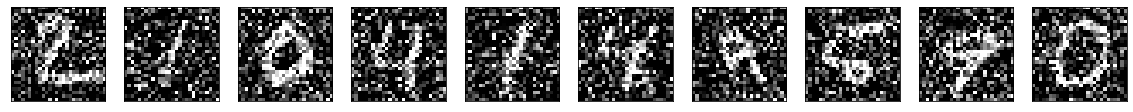

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [1]:
!tensorboard --logdir=/tmp/autoencoder


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.7.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 16s 15ms/step - loss: 0.1607 - val_loss: 0.1174
Epoch 2/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1128 - val_loss: 0.1088
Epoch 3/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1067 - val_loss: 0.1039
Epoch 4/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1038 - val_loss: 0.1019
Epoch 5/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1021 - val_loss: 0.1007
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1009 - val_loss: 0.0996
Epoch 7/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 8/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0993 - val_loss: 0.0983
Epoch 9/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0987 - val_loss: 0.0981
Epoch 10/100
469/469 [==============================] - 6s 14ms/step - loss: 0.09

In [22]:
x_test_denoised = autoencoder.predict(x_test_noisy)

In [23]:
print(x[2].shape)
print(x_test_noisy.shape)

(28, 28, 1)
(10000, 28, 28, 1)


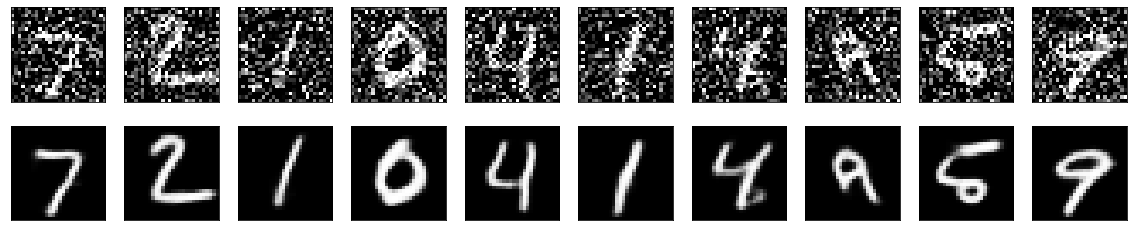

In [24]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    x1 = x_test_denoised[i].reshape(28,28)
    plt.imshow(x1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()